In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.isna().sum(),df.duplicated().sum()

(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 1)

In [5]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

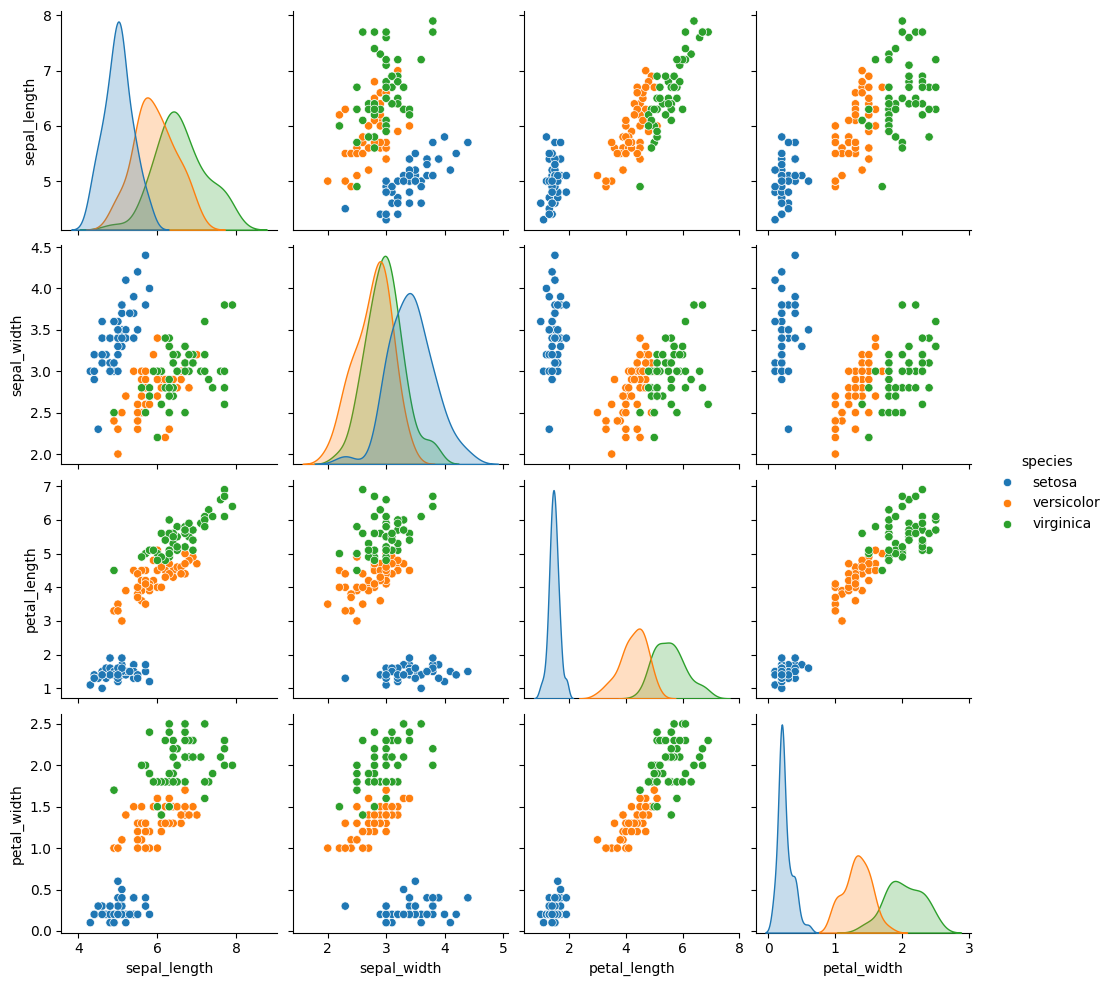

In [6]:
sns.pairplot(df,hue="species")

In [8]:
wcss = []
for i in range(1,50):
    km = KMeans(n_clusters=i)
    km.fit_predict(df.iloc[:,:-1])
    wcss.append(km.inertia_)

In [9]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 41.93716666666667,
 37.85396794871795,
 30.68237834224599,
 29.354228386809265,
 25.874739743744385,
 25.2904975024975,
 24.50335019290397,
 21.570562827523354,
 20.337592397590967,
 22.090497835497835,
 19.655441791868267,
 17.555896103896103,
 16.928125313283214,
 16.590560105798094,
 14.781710671681264,
 15.368204212454215,
 14.357154761904765,
 13.644823870573871,
 13.566568181818187,
 12.637294871794875,
 11.593492063492064,
 12.197829670329673,
 11.645440476190478,
 11.645537962037963,
 10.162805555555558,
 10.911532051282052,
 10.742006493506494,
 9.829965284715286,
 9.532567765567768,
 8.797642857142858,
 8.79632142857143,
 8.511023809523811,
 8.872435786435789,
 8.536811355311357,
 7.700723443223443,
 7.84812728937729,
 7.472082972582973,
 7.179416666666667,
 6.60851515151515,
 6.7620515873015865,
 6.757492424242426,
 6.409500000000001,
 6.091166666666668,
 5.809583333333334]

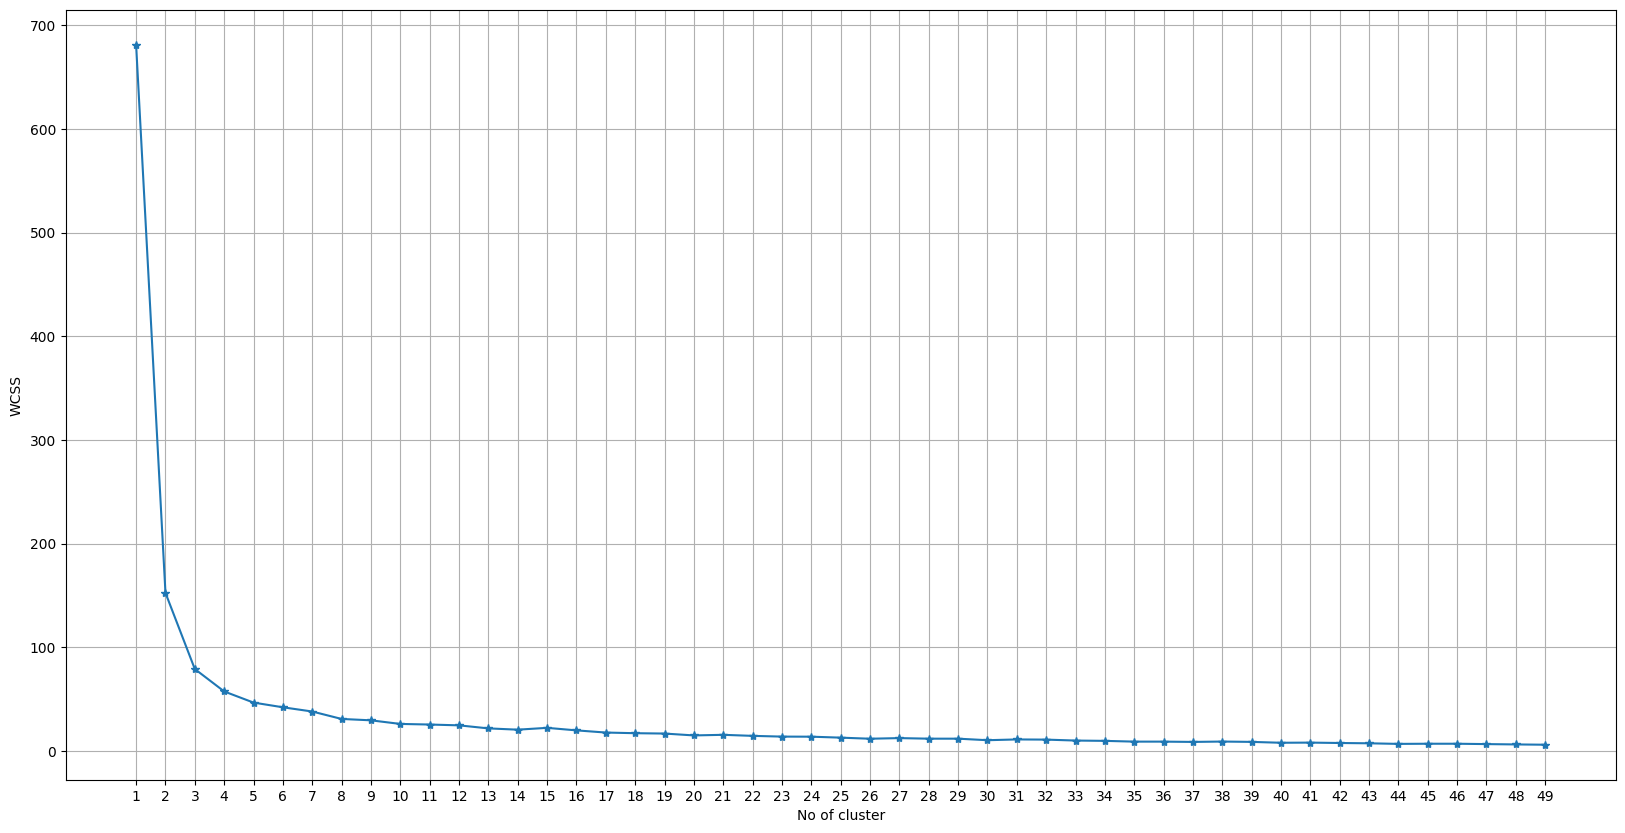

In [12]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1,50)],wcss,marker="*")
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.xticks([i for i in range(1,50)])
plt.grid('x')
plt.show()

In [36]:
KMeans4 = KMeans(n_clusters=4)
pred = KMeans4.fit_predict(df.iloc[:,:-1])
# new_df = pd.concat([df.iloc[:,:-1],pd.DataFrame(pred,columns=["y"])],axis=1,ignore_index=True)
new_df = df.iloc[:,:-1].copy()
new_df["label"] = pred

In [42]:
new_df

sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]

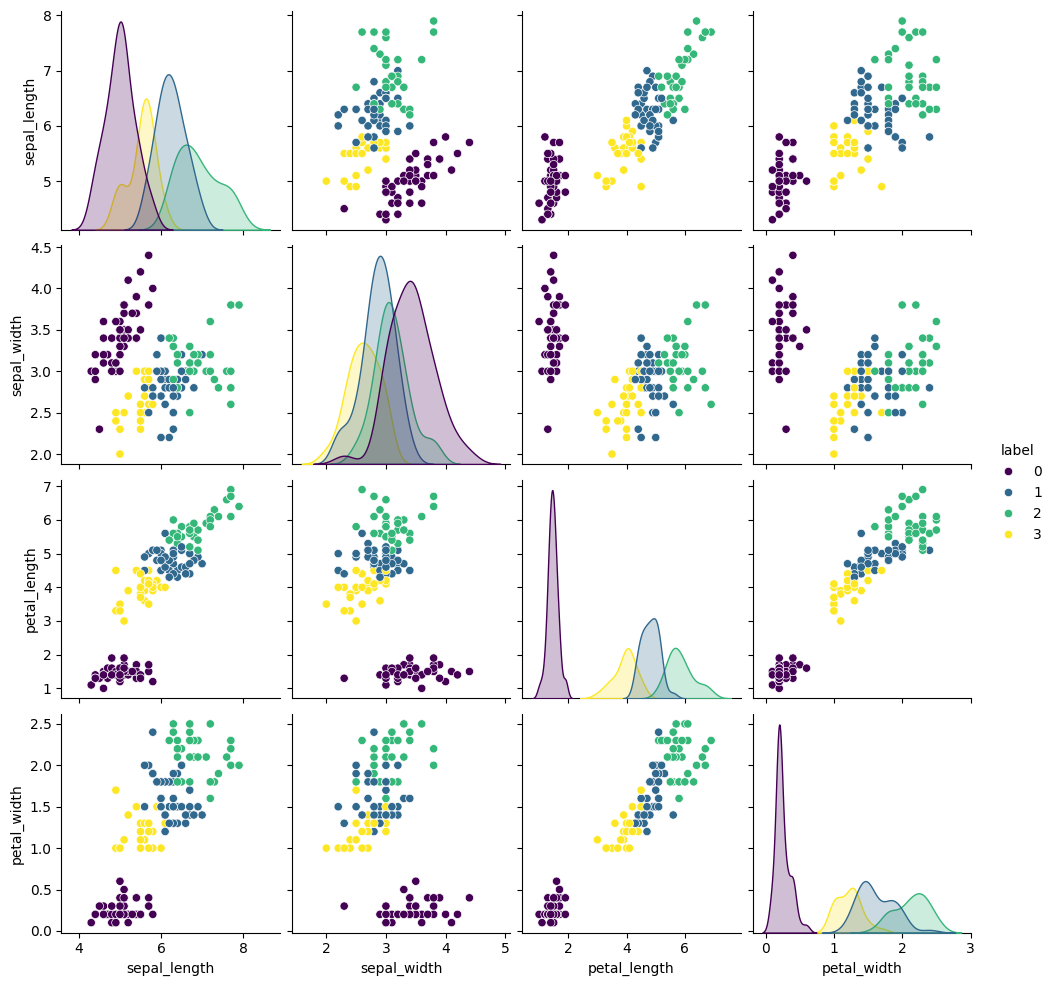

In [46]:
sns.pairplot(new_df,hue='label',palette="viridis")

In [47]:
# here, we got the 4 clusters, now, let's do it with three ! 

In [52]:
Kmeans3 = KMeans(n_clusters=3,random_state=42)
pred3 = Kmeans3.fit_predict(df.iloc[:,:-1])

In [54]:
df_ = df.iloc[:,:-1].copy()
df_["label"] = pred3

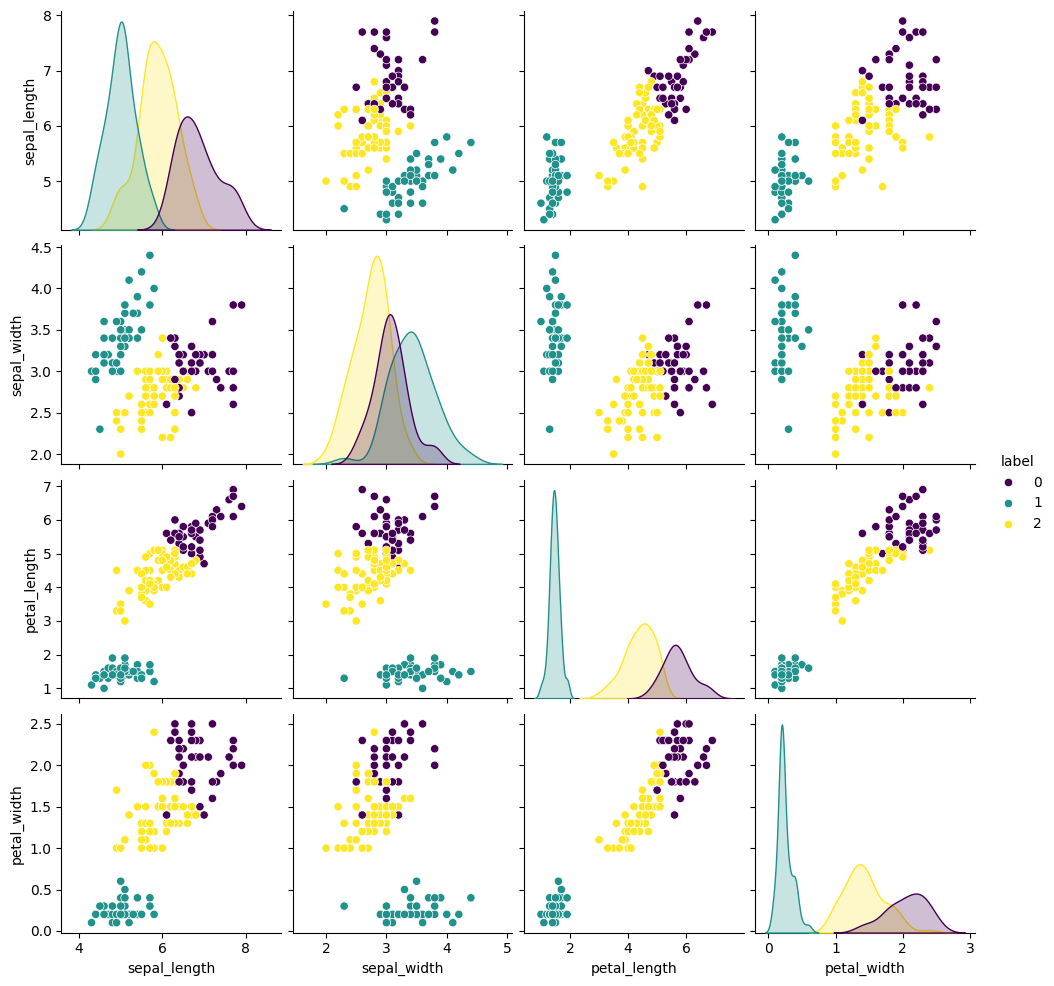

In [56]:
sns.pairplot(df_,hue='label',palette="viridis")

In [ ]:
# above graph matches with the original one ! 